# Class 17: Introduction to statistical inference

Plan for today:
- Review for loops and writing functions
- Introduction to statistical inference
- Introduction to hypothesis tests


In [22]:
import YData

# YData.download.download_class_code(17)   # get class code    
# YData.download.download_class_code(17, TRUE) # get the code with the answers 

# YData.download.download_class_file('project_template.ipynb', 'homework')  # downloads the class project template 
# YData.download_homework(7)  # downloads the 7th homework 

YData.download_data("movies.csv")
YData.download_data("daily_bike_totals.csv")

The file `movies.csv` already exists.
If you would like to download a new copy of the file, please rename the existing copy of the file.
The file `daily_bike_totals.csv` already exists.
If you would like to download a new copy of the file, please rename the existing copy of the file.


If you are using colabs, please run the code below

In [23]:
# !pip install https://github.com/emeyers/YData_package/tarball/master
# from google.colab import drive
# drive.mount('/content/drive')

In [24]:
import statistics
import pandas as pd
import numpy as np
from urllib.request import urlopen

import matplotlib.pyplot as plt
%matplotlib inline

### 0.1 Warm-up exercises using for loops

As we discussed last class, loops allow us to repeat a process many times. They are particularly useful in conjuction with lists to process and store multiple values. 

Let's start with a quick warm up exercise on for loops. The code below loads our bike data from 2014 and can creates two lists which are:

- `weekday`: A list of Booleans specifying whether a day is a weekday
- `num_trips`: A list containing how many trips were taken on each day


In [25]:
import pandas as pd
import matplotlib.pyplot as plt

bikes = pd.read_csv("daily_bike_totals.csv", parse_dates = [0])
bikes_2014 = bikes.query("date > '2013-12-31'").query("date < '2015-01-01'")

weekday = bikes_2014["weekday"].to_list()
num_trips = bikes_2014["trips"].to_list()

print(weekday[0:5])
print(num_trips[0:5])

[True, True, True, False, False]
[6059, 8600, 1144, 2292, 2678]


### Warm up exercise 1.1

Please use a for loop to a list called `weekday_trips` which contains the number of trips that occurred only on weekdays. 


### Warm up exercise 1.2

Now add to your code so that you also create a list called `weekend_trips` that contain the number of trips that occured on all weekend. 

Once you have created these lists create side-by-side boxplots to compare the number of trips taken on weekdays and weekends. 


### 0.2 Warm-up exercises writing functions

For pracice writing functions, let's write a function that will mimic flipping coins. This function will be useful when we start talking about statistical inference. 

In particular, let's write a function called `flip_coins(n, prob)` which will simulate flipping a coin `n` times where:
- `n` is the number of times we have flipped the coin
- `prob` is the probability that each coin flip will return "head"

The function should return the number of "heads" that occurred from flipping the coin `n` times; i.e., it should return a number between 0, which means no heads occurred, and `n` which means a "head" occurred on every flip. 

When writing functions, it is often useful to write the bulk of the code outside of a function and then turn in into a function by wrapping your code in a `def` statement. Let's go through a few steps of writing this function now. 


#### Step 1: Generating random numbers between 0 and 1

We can use the numpy function `np.random.rand(n)` to generate `n` random numbers. Please create a name called `n` and set it equal to 500 to simulate 500 random coin flips. Then use the name `n`, along with the `np.random.rand(n)` to generate 500 random numbers between 0 and 1. Save these random numbers to the name `rand_nums`. 

Finally, to see what these numbers look like, visualize `rand_nums` using a histogram. 


In [26]:
# Use np.random.rand() to generate n = 500 random numbers between 0 and 1, and visualize them as a histogram. 









#### Step 2: Count the number of "heads"

Next create a name called `prob` which has the probability that a coin flip is a "head". Let's set `prob` to be equal to .5 to simulate flipping a fair coin. Then see how many of the `rand_nums` are less than the `prob` value to see how many of your coin flips were "head"; i.e., use `np.sum()` to count how many of your coin flips were heads. 



In [27]:
# Set prob to .5 and count how many values are greater than prob





#### Step 3: Creating the function flip_coins(n, prob)

Now write the function `flip_coins(n, prob)` by taking the code you wrote in the previous two steps and turning it into a function. 

Then try out the function a few times and see how the number of "heads" you get varies from simulation to simulation, and also experiment with different values for the arguments `n` and `prob`. 


In [28]:
# Create a function flip_coins(n, prob) that generates n random numbers and returns how many are less than prob

def flip_coins(n, prob):
    ...




#### Step 4: Adding an additional argument to the function 

Let's add an additional parameter to the `flip_coins` function called `return_prop` which has a default value of `False`; i.e., the function should now be `flip_coins(n, prob, return_prop = False)`. If the `return_prop` is set to `True` that it should return the proportion of coin flips that were heads rather than the number of coin flips that were heads. 

Hint: Adding a conditional statement to your function could be useful. 



In [29]:
# Add an argument return_prop that when set to True will return the proporton of coin flips that were heads (rather than the number of heads)

def flip_coins(n, prob, return_prop = False):
    ...






## 1. Statistical inference

In statistical inference we use a smaller sample of data to make claims about a larger population of data. 

As an example, let's look at the [2020 election](https://www.cookpolitical.com/2020-national-popular-vote-tracker) between Donald Trump and Joe Biden, and let's focus on the results from the state of Georgia. After all the votes had been counted, the resuts showed that:

- Biden received 2,461,854 votes
- Trump received 2,473,633 votes

Since we have all the votes on election data, we can precisely calculate the population parameter of the proportion of votes that Biden received, which we will denote with the symbol $\pi_{Biden}$. 

Let's create names `num_trump_votes` and `num_biden_votes`, and calculate `true_prop_Biden` which is the value $\pi_{Biden}$. 

In [30]:
num_trump_votes = 2461854  # 2,461,854
num_biden_votes = 2473633  # 2,473,633


# calculate the proportion of people who voted for Biden





The code below creates a DataFrame called `georgia_df` that captures these election results. Each row in the DataFrame represents a votes. The column `Voted Biden` is `True` if a voter voted for Biden and `False` if the voter voted for Trump. 

In [31]:
biden_votes = np.repeat(True, num_biden_votes)     # create 2,473,633 Trues for the Biden votes
trump_votes = np.repeat(False, num_trump_votes)    # create 2,461,854 Falses for the Trump votes
election_outcome = np.concatenate((biden_votes, trump_votes))  # put the votes together

georgia_df = pd.DataFrame({"Voted Biden": election_outcome})  # create a DataFrame with the data
georgia_df = georgia_df.sample(frac = 1)   # shuffle the order to make it more realistic

georgia_df.head()

,Voted Biden
69985,True
2280616,True
1146009,True
3340557,False
2996191,False


Now suppose we didn't know the actual value of $\pi_{Biden}$ and we wanted to estimate it based on a poll of 1,000 voters. We can simulate this by using the pandas `.sample(n = )` method.

Let's simulate sampling random voters

In [32]:
# sample 10 random points



In [33]:
# simulate proportions of voters that voted for Biden - i.e., p-hats





### 1b. Creating a sampling distribution via taking random samples

Suppose 100 polls were conducted. How many of them would show that Biden would get the majority of the vote? 

Let's simulate this "sampling distribution" of statistics now... 


In [34]:
%%time









CPU times: user 7 µs, sys: 6 µs, total: 13 µs
Wall time: 22.9 µs


In [35]:
# plot a histogram of the sampling distribution





### 1c. Creating a sampling distributions via coin flips (a faster way to simulate data)

Rather than simulating polling outcomes by pulling random samples from a DataFrame, let's simulate each vote by simulating randomly flipping a coin, where the probability of getting a "Head" (True value) is the probability of Biden getting a vote.

To do this we can generate random numbers between 0 and 1. If a number is less than the value of $\pi_{Biden}$, then it is a vote for Biden (i.e., a `True` value) otherwise it is a vote for Trump (`False` value). 


In [36]:
# simulate one coin flip of a fair coin; i.e., simulate who one person voted for 
# (50% chance of being heads, or Biden proportion chance of being heads)






Let's generate one sample of 1,000 voters...

In [37]:

# usse `np.random.rand()` to generate 1,000 numbers between 0 and 1




# visualize these 1,000 numbers as a histogram



In [38]:
# convert to a vector of Booleans (True = vote for Biden, False = vote for Trump)




In [39]:
# Calculate the proportion of votes for Biden in our sample

# method 1



# method 2





In [40]:
# function to generate proportion of Biden voters based on a poll

def generate_prop_biden(poll_size):
    random_sample = np.random.rand(poll_size) <= true_prop_Biden
    return np.mean(random_sample)


In [41]:
%%time

# sampling distribution of many polls conducted

sample_size = 1000
num_simulations = 100

sampling_dist = []

for i in range(num_simulations):
    prop_biden = generate_prop_biden(sample_size)
    sampling_dist.append(prop_biden)

NameError: name 'true_prop_Biden' is not defined

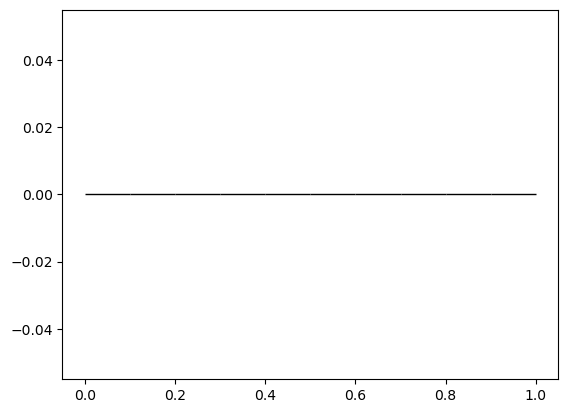

In [42]:
plt.hist(sampling_dist, edgecolor = "black", bins = 10);

## 2. Hypothesis tests

In hypothesis testing, we start with a claim about a population parameter (e.g., µ = 4.2, or π = 0.25).

This claim implies we should get a certain distribution of statistics, called "The null distribution". 

If our observed statistic is highly unlikely to come from the null distribution, we reject the claim. 

We can break down the process of running a hypothesis test into 5 steps. 

1. State the null and alternative hypothesis
2. Calculate the observed statistic of interest
3. Create the null distribution 
4. Calculate the p-value 
5. Make a decision

Let's run through these steps now!


#### Step 1: State the null and alternative hypothesis






#### Step 2: Calculate the observed statistic of interest


In [43]:
# load the data

movies = pd.read_csv("movies.csv")

movies.head(3)

,year,imdb,title,test,clean_test,binary,budget,domgross,intgross,code,...,director,released,actors,genre,awards,runtime,type,poster,imdb_votes,error
0,2013,tt1711425,21 &amp; Over,notalk,notalk,FAIL,13000000,25682380.0,42195766.0,2013FAIL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2012,tt1343727,Dredd 3D,ok-disagree,ok,PASS,45000000,13414714.0,40868994.0,2012PASS,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2013,tt2024544,12 Years a Slave,notalk-disagree,notalk,FAIL,20000000,53107035.0,158607035.0,2013FAIL,...,Steve McQueen,08 Nov 2013,"Chiwetel Ejiofor, Dwight Henry, Dickie Gravois...","Biography, Drama, History",Won 3 Oscars. Another 131 wins & 137 nominations.,134 min,movie,http://ia.media-imdb.com/images/M/MV5BMjExMTEz...,"143,446",NaN


In [44]:
# reduce data to a smaller number of columns: "title" and "binary"




In [45]:
# calculate the proportion of movies that pass the Bechdel test






#### Step 3: Create the null distribution 

We need to create a null distribution, which is the distribution of statistics we would expect to get if the null hypothesis is true. 

**Question**: about what percent of the movies would we expect to pass the Bechdel test if the null distribution was true? 

**Answer**: 

Let's create simulated data that is consistent with this!


In [46]:
# Let's generate one proportion consistent with the null hypothesis

# get the total number of movies in our dataset n


# proportion consistent with the null hypothesis



# one statistic consistent with null hypothesis




In [47]:
# Let's generate a null distribution 






In [48]:
# visualize the null distribution 





#### Step 4: Calculate the p-value 

Calculate the proportion of points in the null distribution that are more extreme than the observed statistic. 


In [49]:
# Calculate the p-value

# create a Boolean vector indicating whether each p-hat in the null distribution 
# was greater than the observed proportion that passed the Bechdel test




# calculate the p-value 





#### Step 5: Make a decision


